In [6]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
# sns.set_context("talk")

In [7]:
ax_order = 'first'
ax_order_str = 'axF'

In [8]:
with open('../../results/ttest_results_mlp.P', 'rb') as f:
    mlp_results = pickle.load(f)

with open('../../results/ttest_%s_results_rnn.P' %(ax_order_str), 'rb') as f:
    rnn_results = pickle.load(f)


In [9]:
mlp_results =  mlp_results['ttest_results']
rnn_results =  rnn_results['ttest_results']

runs, checkpoints:  20 21


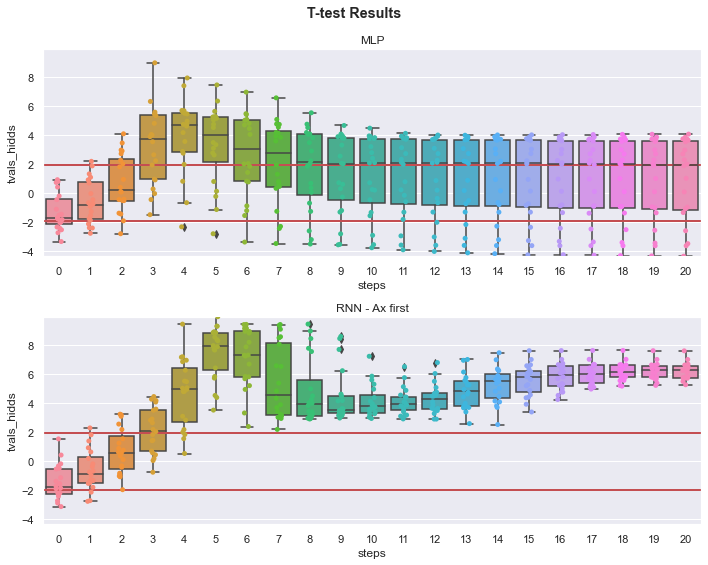

In [10]:
# MLP
t_hidds_mlp = mlp_results['t_stat_hidds']
# RNN
t_hidds_rnn = rnn_results['t_stat_hidds']

mi = min(min(np.min(t_hidds_mlp, axis=0)), min(np.min(t_hidds_rnn, axis=0)))
mx = max(max(np.max(t_hidds_mlp, axis=0)), max(np.max(t_hidds_rnn, axis=0)))

runs = t_hidds_mlp.shape[0]
checkpoints = t_hidds_mlp.shape[1]
print('runs, checkpoints: ', runs, checkpoints)

fig, axs = plt.subplots(2, 1, figsize=(10,8))
val_name = 'tvals_hidds'
threshold = 1.96
# MLP
val = t_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot 
ax = axs[0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = t_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ax_order))

for ax in axs:
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.axhline(y=-1*threshold, color='r', linewidth=2)
    ax.set_ylim([mi, mx])

fig.suptitle('T-test Results', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ttest_results_both_models_hidds' %(ax_order_str)
fig.savefig(('../../figures/' + fig_str + '.jpg'), 
        bbox_inches = 'tight', pad_inches = 0)


